In [4]:
import numpy as np
import pandas as pd 
import os
#print(os.listdir("Dataset"))
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud


In [5]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25856 sha256=197ff608193adcbf17af232a50c41277a857f8f54c747f020819aff50f27bdf4
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\fc\9c\6d\1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
embeddings_index = {}
f = open('glove.6B.50d.txt',encoding="utf-8")
for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vecotrs representing the embedding for the word
    embeddings_index[word] = coefs
f.close()

print('GloVe data loaded')

GloVe data loaded


In [9]:
x=pd.read_csv("complete_dataset.csv")

In [10]:
import re

## Iterate over the data to preprocess by removing stopwords
lines_without_stopwords=[] 
for line in x: 
    line = line.lower()
    line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    new_line=[]
    for word in line_by_words:
        if word not in stop:
            new_line.append(word)
    lines_without_stopwords.append(new_line)
texts = lines_without_stopwords

print(texts[0:5])

[['decline', 'coal', 'start', 'started', 'natural', 'gas', 'took', 'started', 'begin', 'president', 'george', 'w', 'bushs', 'administration', 'surovell', 'said', 'decline', 'coal', 'started', 'natural', 'gas', 'took', 'started', 'begin', 'president', 'george', 'w', 'bushs', 'administration', 'doubt', 'natural', 'gas', 'gaining', 'ground', 'coal', 'generating', 'electricity', 'trend', 'started', '1990s', 'clearly', 'gained', 'speed', 'bush', 'administration', 'production', 'natural', 'gas', 'competitor', 'coal', 'picked', 'analysts', 'give', 'little', 'credit', 'blame', 'bush', 'trend', 'note', 'factors', 'technological', 'innovation', 'entrepreneurship', 'policies', 'previous', 'administrations', 'laying', 'groundwork', 'natural', 'gas', 'boom'], ['hillary', 'clinton', 'agrees', 'john', 'mccain', 'voting', 'give', 'george', 'bush', 'benefit', 'doubt', 'iran', 'obama', 'said', 'would', 'voted', 'amendment', 'present', 'though', 'clinton', 'may', 'agreed', 'mccain', 'issue', 'technically

In [11]:
# Code adapted from (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# Vectorize the text samples

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 64
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)



Found 26164 unique tokens.


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
y=le.fit_transform(df["label"])

In [15]:
y

array([2, 3, 1, ..., 5, 1, 0])

In [16]:
labels = to_categorical(np.asarray(y))
print(data.shape)
print(labels.shape)

(11322, 80)
(11322, 6)


In [17]:
## More code adapted from the keras reference (https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)
# prepare embedding matrix 
from keras.layers import Embedding
from keras.initializers import Constant

## EMBEDDING_DIM =  ## seems to need to match the embeddings_index dimension
EMBEDDING_DIM = embeddings_index.get('a').shape[0]
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

(2501, 50)


Text(0.5, 1.0, 'example vectors')

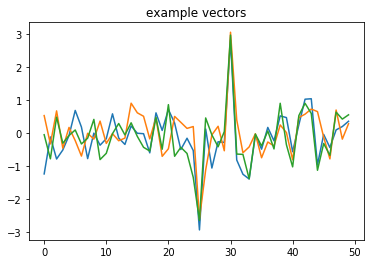

In [18]:
## Peeking at the embedding matrix values
print(embedding_matrix.shape)
plt.plot(embedding_matrix[16])
plt.plot(embedding_matrix[37])
plt.plot(embedding_matrix[18])
plt.title('example vectors')

In [19]:
## Code from: https://medium.com/@sabber/classifying-yelp-review-comments-using-cnn-lstm-and-pre-trained-glove-word-embeddings-part-3-53fcea9a17fa
## To create and visualize a model

from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

model2 = Sequential()
model2.add(Embedding(num_words, 50, input_length=80, weights= [embedding_matrix], trainable=False))

model2.add(Conv1D(96, 11 ,strides = 4, activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 3, strides = 2))

model2.add(Conv1D(256, 5,padding = 'same', activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 3, strides = 2))

model2.add(Conv1D(384, 3,padding = 'same', activation = 'relu'))
model2.add(Conv1D(384, 3,padding = 'same', activation = 'relu'))
model2.add(Conv1D(256, 3,padding = 'same', activation = 'relu'))
model2.add(MaxPooling1D(pool_size = 3,strides = 2))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu' ))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(6, activation = 'relu'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 50)            125050    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 96)            52896     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 96)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 256)            123136    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 256)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 384)            295296    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3, 384)           

In [20]:

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
epochs = 50
batch_size = 15

history2 = model2.fit(data, labels, epochs=epochs, batch_size=batch_size,validation_split = 0.2)


Train on 9057 samples, validate on 2265 samples
Epoch 1/50
9057/9057 [==============================] - 15s 2ms/step - loss: 0.4491 - accuracy: 0.8326 - val_loss: 0.4454 - val_accuracy: 0.8333
Epoch 2/50
9057/9057 [==============================] - 14s 2ms/step - loss: 0.4442 - accuracy: 0.8333 - val_loss: 0.4451 - val_accuracy: 0.8333
Epoch 3/50
9057/9057 [==============================] - 13s 1ms/step - loss: 0.4443 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.8333
Epoch 4/50
9057/9057 [==============================] - 13s 1ms/step - loss: 0.4444 - accuracy: 0.8333 - val_loss: 0.4448 - val_accuracy: 0.8333
Epoch 5/50
9057/9057 [==============================] - 13s 1ms/step - loss: 0.4422 - accuracy: 0.8332 - val_loss: 0.4410 - val_accuracy: 0.8333
Epoch 6/50
9057/9057 [==============================] - 13s 1ms/step - loss: 0.4432 - accuracy: 0.8333 - val_loss: 0.4628 - val_accuracy: 0.8319
Epoch 7/50
9057/9057 [==============================] - 13s 1ms/step - loss: 0.441

In [22]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [23]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS =10
BS = 32

In [24]:
model = Sequential()
model.add(Embedding(num_words, 50, input_length=80, weights= [embedding_matrix], trainable=False))


In [25]:
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

NameError: name 'baseModel' is not defined

In [ ]:
model.fit(data, np.array(labels), validation_split=0.2, epochs = 10)


In [ ]:
data[0].shape